In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 필요한 모듈 생성

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#과제

##Titanic 데이터를 가지고 5 개의 FE 방법들 직접 사용해보기 (오늘 피피티에 소개되지 않은 FE 방법도 괜찮음)

In [66]:
titanic = pd.read_csv('/content/drive/MyDrive/YBIGTA/0719 FE [DA]-20220725T131118Z-001/0719 FE [DA]/과제/titanic.csv')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [67]:
titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


##1. 결측치 처리

In [68]:
print(titanic.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [69]:
#Cabin은 결측치가 지나치게 많은 column, 아예 삭제해버리자
titanic = titanic.drop(['Cabin'], axis = 1)

#사실 Cabin의 경우 탑승자에 관한 중요한 default 변수를 알 수 있는 정보임으로 함부로 삭제하면 안된다. 그러나 이를 수행하기 위해서는
##ticket 번호에 입각해서 탑승석의 위치를 추정해 변수를 복원하는 등의 방법을 사용해야함으로 여기서는 따로 사용하지 않았다.

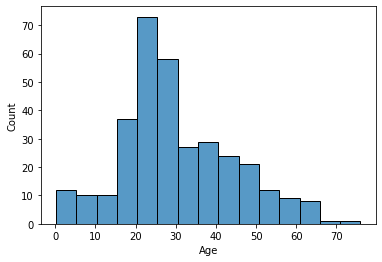

In [70]:
#Age의 결측치를 처리하기 위해서는 우선 age의 분포를 확인해야한다. 
sns.histplot(data = titanic['Age'])

In [71]:
#skewed 되어있기 때문에 평균을 쓰는 것은 곤란함. modest 값을 써도 되겠지만 여기서는 임의로 median 값을 사용했다.
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

In [72]:
#fare는 결측치가 하나이기 때문에 임의로 중앙값으로 결측치를 처리하였다.
titanic['Fare'] = titanic['Fare'].fillna(titanic['Fare'].median())

In [73]:
titanic.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

##2. OneHot Encoding

In [74]:
titanic['Pclass'].value_counts()

pd.get_dummies(titanic['Pclass'])

,1,2,3
0,0,0,1
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1
...,...,...,...
413,0,0,1
414,1,0,0
415,0,0,1
416,0,0,1


## 3. LabelEncoding

In [75]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

encoded = encoder.fit_transform(titanic['Embarked'])
titanic['Embarked_class'] = encoded

titanic.Embarked_class.value_counts()

2    270
0    102
1     46
Name: Embarked_class, dtype: int64

## 4. Indicator

In [62]:
titanic['Age'].describe()

count                                                   418
unique                                                   80
top       <bound method NDFrame._add_numeric_operations....
freq                                                     86
Name: Age, dtype: object

In [76]:
agegroup = []

for age in titanic.Age:
  if age < 25:
    agegroup.append('young')
  elif 25 <= age < 45:
    agegroup.append('middle')
  else:
    agegroup.append('old')

titanic['agegroup'] = agegroup

In [77]:
titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked_class,agegroup
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,middle
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,2,old
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,old
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,2,middle
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,2,young


# 5. scaling

In [78]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
mm_scaler = MinMaxScaler()
sd_scaler = StandardScaler()

# MinMax Scaling
mm_scaler = mm_scaler.fit_transform(titanic['Fare'].values.reshape(-1,1))
titanic['mm_scaled_Fare'] = mm_scaler

# Standard Scaling
sd_scaler = sd_scaler.fit_transform(titanic['Fare'].values.reshape(-1,1))
titanic['sd_scaled_Fare'] = sd_scaler

titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked_class,agegroup,mm_scaled_Fare,sd_scaled_Fare
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,middle,0.015282,-0.497413
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,2,old,0.013663,-0.512278
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,old,0.018909,-0.464100
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,2,middle,0.016908,-0.482475
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,2,young,0.023984,-0.417492
